<a href="https://colab.research.google.com/github/Uzma-Jawed/AIandDataSci-class_work-and-practice/blob/main/28_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 Uzma Jawed

📅 Class Work - August 16



---


## 📊 Hypothesis Testing & Time Series Stationarity (T-test, Z-test, Chi-Square, ADF, KPSS)


---




🧪 This notebook covers **statistical hypothesis tests** that are commonly used in Data Science:

1. T-test (compare sample mean to hypothesized mean)  
2. Z-test for proportions  
3. Chi-square test of independence  
4. Augmented Dickey-Fuller (ADF) test for stationarity  
5. KPSS test for stationarity
---

### 1. One-Sample T-Test

- **Goal:** Check if the mean of a sample is equal to a hypothesized population mean.  
- **Null Hypothesis (H₀):** Sample mean = hypothesized mean.  
- **Alternative Hypothesis (H₁):** Sample mean ≠ hypothesized mean.  

We use a significance level **α = 0.05**.

---


In [25]:
from scipy import stats
import numpy as np

# Sample data
data = np.array([12, 8, 9, 14, 7, 11, 10, 13, 9, 12])
mu0 = 10  # Hypothesized mean
alpha = 0.05

# Perform one-sample t-test
t_stat, p = stats.ttest_1samp(data, popmean=mu0)

print("t:", t_stat, "p:", p)
print("Decision:", "Reject H0" if p <= alpha else "Fail to reject H0")

t: 0.6956083436402524 p: 0.5042379030441878
Decision: Fail to reject H0




---

📌 One-Sample T-Test (visualize distribution vs hypothesized mean)



---



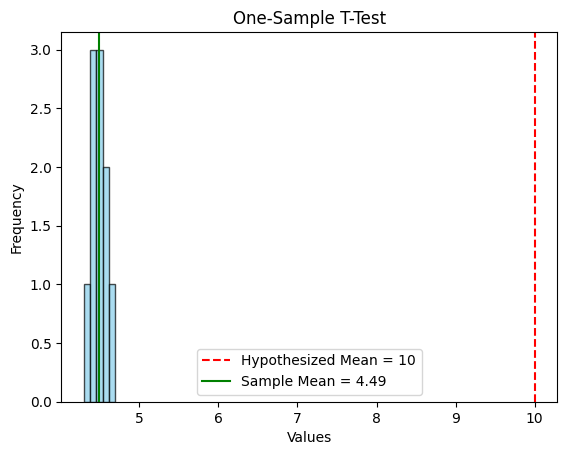

In [36]:
import matplotlib.pyplot as plt

plt.hist(data, bins=5, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mu0, color='red', linestyle='--', label=f'Hypothesized Mean = {mu0}')
plt.axvline(np.mean(data), color='green', linestyle='-', label=f'Sample Mean = {np.mean(data):.2f}')
plt.title("One-Sample T-Test")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()



---


### 2. Z-Test for Proportions

- **Goal:** Compare proportions between two groups.  
- **Null Hypothesis (H₀):** p₁ = p₂ (no difference in proportions).  
- **Alternative Hypothesis (H₁):** p₁ ≠ p₂.  

---

In [27]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Example: Success counts in two groups
successes = np.array([45, 35])
nobs = np.array([100, 100])
alpha = 0.05

# Perform two-proportion z-test
z, p = proportions_ztest(successes, nobs, alternative='two-sided')

print("z:", z, "p:", p)
print("Decision:", "Reject H0" if p <= alpha else "Fail to reject H0")

z: 1.443375672974065 p: 0.14891467317876556
Decision: Fail to reject H0




---

📌 Z-Test for Proportions (bar plot for group success rates)



---



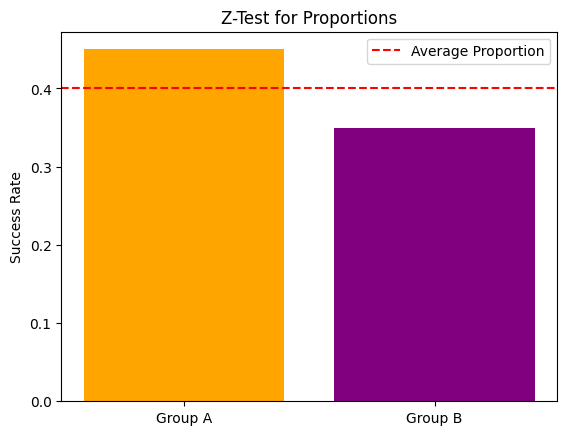

In [37]:
groups = ['Group A', 'Group B']
rates = successes / nobs

plt.bar(groups, rates, color=['Orange','Purple'])
plt.axhline(y=np.mean(rates), color='red', linestyle='--', label='Average Proportion')
plt.title("Z-Test for Proportions")
plt.ylabel("Success Rate")
plt.legend()
plt.show()



---


### 3. Chi-Square Test of Independence

- **Goal:** Test whether two categorical variables are independent.  
- **Null Hypothesis (H₀):** Variables are independent.  
- **Alternative Hypothesis (H₁):** Variables are not independent.  

---

In [30]:
import numpy as np
from scipy.stats import chi2_contingency

# Example 2x3 contingency table
table = np.array([
    [20, 15, 25],
    [30, 22, 18]
])

chi2, p, dof, expected = chi2_contingency(table)
alpha = 0.05

print("chi2:", chi2, "p:", p, "dof:", dof)
print("Decision:", "Reject H0" if p <= alpha else "Fail to reject H0")

chi2: 3.7166202747598094 p: 0.1559359181244426 dof: 2
Decision: Fail to reject H0




---

📌 Chi-Square Test (heatmap of contingency table)

---





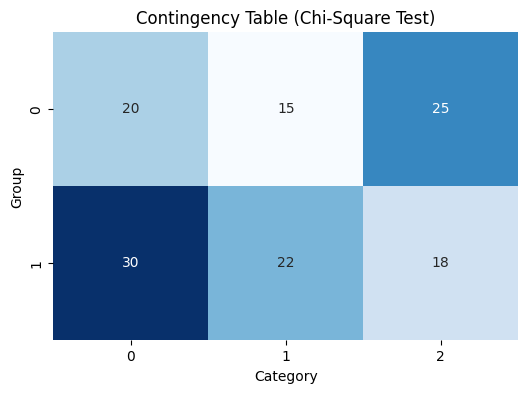

In [31]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(table, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Contingency Table (Chi-Square Test)")
plt.xlabel("Category")
plt.ylabel("Group")
plt.show()



---


### 4. Augmented Dickey-Fuller (ADF) Test

- **Goal:** Check if a time series is **stationary**.  
- **Null Hypothesis (H₀):** Series is **non-stationary** (has a unit root).  
- **Alternative Hypothesis (H₁):** Series is **stationary**.  

---

In [32]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Sample time series
data = [4.4, 4.5, 4.3, 4.4, 4.6, 4.5, 4.7, 4.5, 4.4, 4.6]
series = pd.Series(data)

# Run ADF test
result = adfuller(series)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

alpha = 0.05
print("Decision:", "Reject H0 → Series is stationary" if result[1] <= alpha else "Fail to reject H0 → Series is non-stationary")

ADF Statistic: -4.251241812006862
p-value: 0.000538970781735789
Critical Values: {'1%': np.float64(-5.354256481481482), '5%': np.float64(-3.6462381481481483), '10%': np.float64(-2.901197777777778)}
Decision: Reject H0 → Series is stationary




---


### 5. KPSS Test

- **Goal:** Complementary test for stationarity.  
- **Null Hypothesis (H₀):** Series is **stationary**.  
- **Alternative Hypothesis (H₁):** Series is **non-stationary**.  

> ADF + KPSS together give a stronger conclusion.  

---

In [33]:
from statsmodels.tsa.stattools import kpss
import pandas as pd

# Same series as above
data = [4.4, 4.5, 4.3, 4.4, 4.6, 4.5, 4.7, 4.5, 4.4, 4.6]
series = pd.Series(data)

# Run KPSS test
stat, p_value, lags, crit = kpss(series, regression='c', nlags='auto')

print('KPSS Statistic:', stat)
print('p-value:', p_value)
print('Critical Values:', crit)

alpha = 0.05
print("Decision:", "Reject H0 → Series is non-stationary" if p_value <= alpha else "Fail to reject H0 → Series is stationary")

KPSS Statistic: 0.27170542635659106
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Decision: Fail to reject H0 → Series is stationary


/tmp/ipython-input-3119482534.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, lags, crit = kpss(series, regression='c', nlags='auto')




---

📌 Time Series (ADF & KPSS) — Line Plot


---



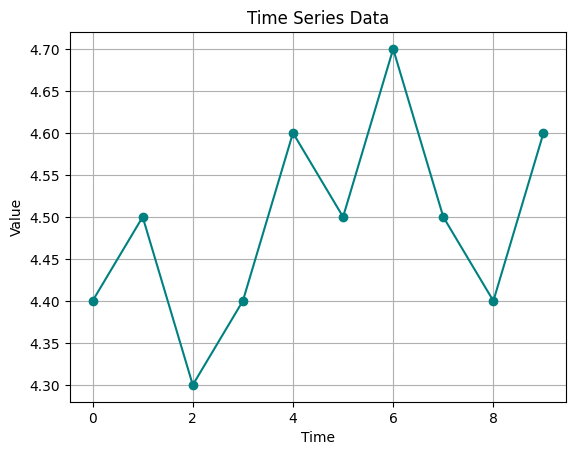

In [34]:
plt.plot(series, marker='o', linestyle='-', color='teal')
plt.title("Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()



---


### 📌 Conclusion: When to Use Each Test

1. **T-Test (One-Sample)**  
   - Use when comparing the **mean of a sample** to a known/hypothesized population mean.  
   - Example: Is the average height of students = 170 cm?

2. **Z-Test for Proportions**  
   - Use when comparing **proportions between groups**.  
   - Example: Is the pass rate in Group A different from Group B?

3. **Chi-Square Test of Independence**  
   - Use for **categorical × categorical** variables.  
   - Example: Is gender independent of preference for a product?

4. **ADF Test (Augmented Dickey-Fuller)**  
   - Use to check if a **time series is stationary**.  
   - H₀: Non-stationary  
   - Example: Stock prices usually fail ADF (non-stationary).

5. **KPSS Test**  
   - Also checks stationarity, but opposite hypothesis:  
     - H₀: Stationary  
     - H₁: Non-stationary  
   - Often used **alongside ADF** for confirmation.  

---

✅ **Tip for Data Science:**  
- If **both ADF and KPSS** agree → strong evidence.  
- If they disagree → the series may be **trend-stationary** or need **differencing**.  

---


### 🎯 Final Recap

Here’s a quick visual summary of our statistical tests and time series analysis.



---




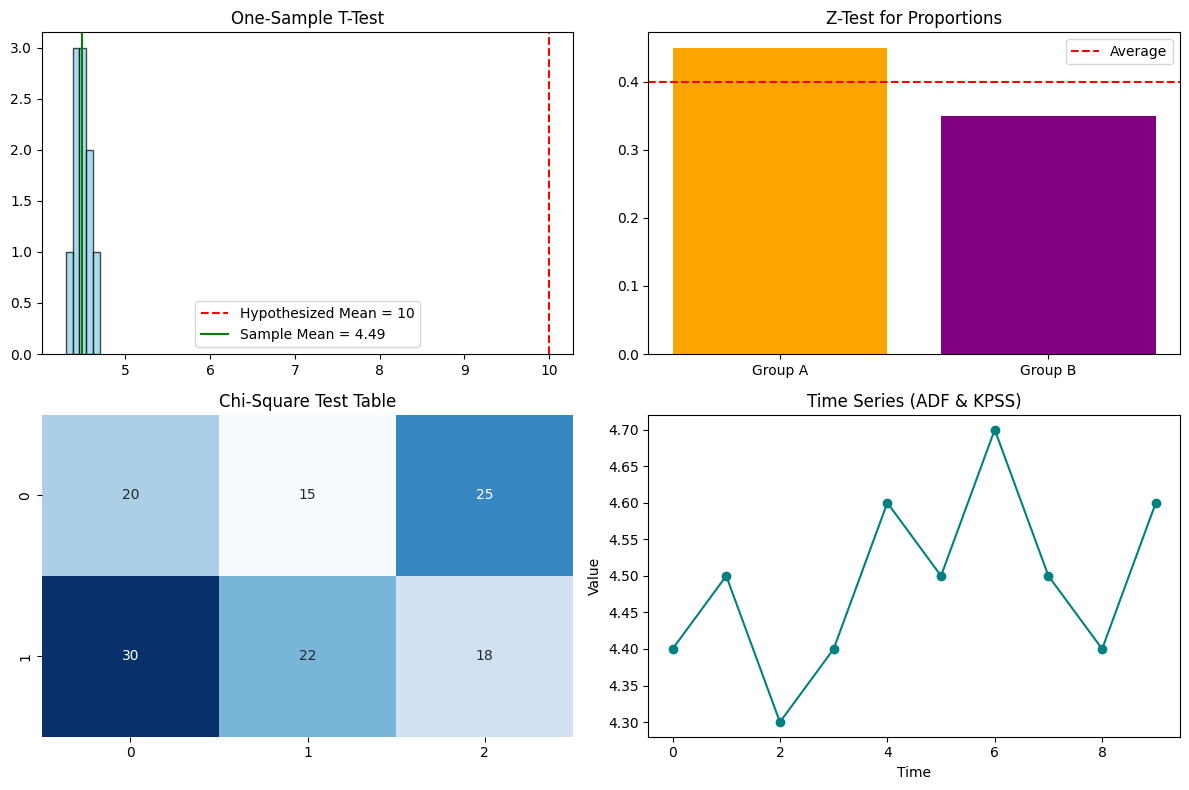

In [35]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12,8))

# 1. T-Test Distribution
axs[0,0].hist(data, bins=5, alpha=0.7, color='skyblue', edgecolor='black')
axs[0,0].axvline(mu0, color='red', linestyle='--', label=f'Hypothesized Mean = {mu0}')
axs[0,0].axvline(np.mean(data), color='green', linestyle='-', label=f'Sample Mean = {np.mean(data):.2f}')
axs[0,0].set_title("One-Sample T-Test")
axs[0,0].legend()

# 2. Z-Test Proportions
groups = ['Group A', 'Group B']
rates = successes / nobs
axs[0,1].bar(groups, rates, color=['orange','purple'])
axs[0,1].axhline(y=np.mean(rates), color='red', linestyle='--', label='Average')
axs[0,1].set_title("Z-Test for Proportions")
axs[0,1].legend()

# 3. Chi-Square Heatmap (using table values)
sns.heatmap(table, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[1,0])
axs[1,0].set_title("Chi-Square Test Table")

# 4. Time Series Line Plot
axs[1,1].plot(series, marker='o', linestyle='-', color='teal')
axs[1,1].set_title("Time Series (ADF & KPSS)")
axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("Value")

plt.tight_layout()
plt.show()



---
### 🌟 Closing Note

Statistics is not just about numbers, it’s about **turning data into decisions**.  
Each test we applied (T-Test, Z-Test, Chi-Square, ADF, KPSS) gives us the tools to **ask better questions** and **find meaningful patterns** in data.  

> "Data tells a story. Statistics helps us listen." 📊✨


---



